In [56]:
import numpy as np
import sympy as sp

In [57]:
sp.init_printing(use_latex=True)

In [58]:
x, nu, t, pi, sin, cos = sp.symbols('x nu t pi sin cos')

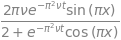

In [59]:
a = 1
b = 2

u = (2 * nu * a * sp.pi * sp.exp(-nu * sp.pi**2 * t) * sp.sin(sp.pi * x))/(b + a * sp.exp(-nu * sp.pi**2 * t) * sp.cos(sp.pi * x))

u

In [60]:
# uprime = u.diff(x)

# uprime

In [67]:
from sympy.utilities.lambdify import lambdify
 
ufunc = lambdify((t,x,nu),u)

ufunc(1,2,3)

In [137]:
from matplotlib import pyplot as plt

## variable declarations
nx = 201
nt = 500
dx = 2 * np.pi / (nx - 1)

nu = 0.07
dt = dx * nu

x = np.linspace(0,2*np.pi,nx)
un = np.zeros(nx)

t = 0

u = np.asarray([ufunc(t, x0, nu) for x0 in x])
# Convert ufunc to a numpy array u using np.asarray
# t = 0, nu = 0.07 and x0 in x, which is a np.linspace
#print(u)
u[-1]

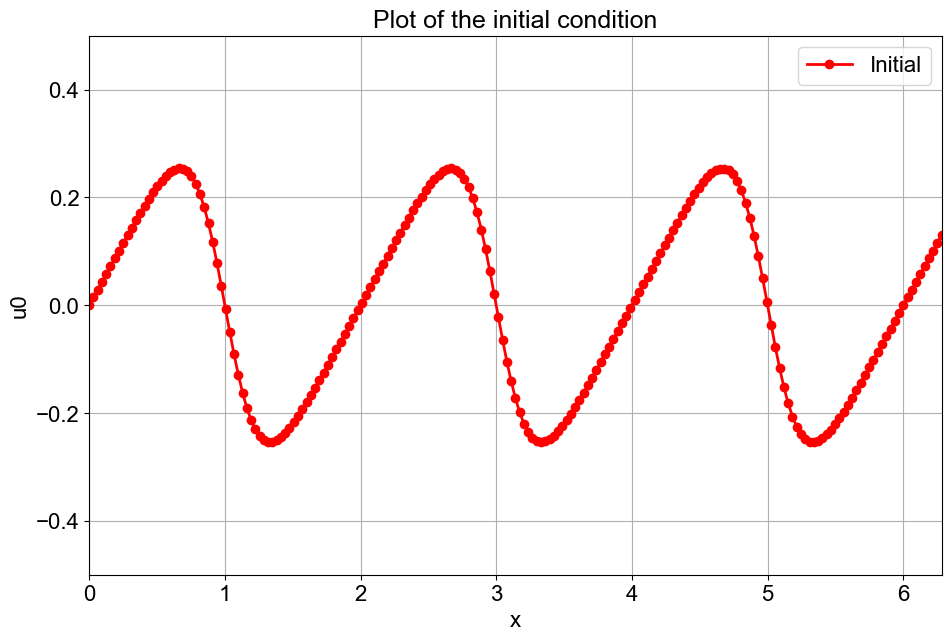

In [138]:
# Set default font to Arial
plt.rcParams['font.family'] = 'arial'
# Set default font size
plt.rcParams['font.size'] = 16

# Create a new figure with a specific size
plt.figure(figsize=(11, 7), dpi = 100)

# Use pyplot to create a line plot of y vs. x with a specific color, linewidth, and label for the legend
plt.plot(x, u, color='red', linewidth=2, marker='o', label='Initial')

# Add labels to the x and y axes with a specific font size
plt.xlabel('x', fontsize=16)
plt.ylabel('u0', fontsize=16)

# Add a title with a specific font size
plt.title('Plot of the initial condition', fontsize=18)

# Add a grid
plt.grid(True)

# Add a legend with a specific location
plt.legend(loc='upper right')

# Set the limit for the x and y axes
plt.xlim([0, 2*np.pi])
plt.ylim([-0.5, 0.5])

# Set the ticks for the x and y axes
#plt.xticks(np.arange(0, 2*np.pi, 1))
#plt.yticks(np.arange(-1, 1, 1))

# Display the plot
plt.show()

In [139]:
# define function to compute spatial derivatives
def spatial_derivatives(u, dx, nu):
    # computes first and second spatial derivatives with periodic boundaries
    dudx = np.zeros_like(u)
    d2udx2 = np.zeros_like(u)

    dudx[1:-1] = (u[2:] - u[:-2]) / (2 * dx)
    dudx[0] = (u[1] - u[-2]) / (2 * dx)  # periodic left boundary
    dudx[-1] = dudx[0]                   # periodic right boundary

    d2udx2[1:-1] = (u[2:] - 2 * u[1:-1] + u[:-2]) / (dx**2)
    d2udx2[0] = (u[1] - 2 * u[0] + u[-2]) / (dx**2)  # periodic left boundary
    d2udx2[-1] = d2udx2[0]                          # periodic right boundary

    return dudx, d2udx2

# define function to compute the rhs of Burgers' equation
def rhs_burgers(u, dx, nu):
    # computes the right-hand side of burgers' equation
    dudx, d2udx2 = spatial_derivatives(u, dx, nu)
    return -u * dudx + nu * d2udx2

# define rk4 step method
def rk4_step(u, dt, dx, nu):
    # performs one rk4 time integration step
    k1 = rhs_burgers(u, dx, nu)
    k2 = rhs_burgers(u + 0.5 * dt * k1, dx, nu)
    k3 = rhs_burgers(u + 0.5 * dt * k2, dx, nu)
    k4 = rhs_burgers(u + dt * k3, dx, nu)

    return u + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

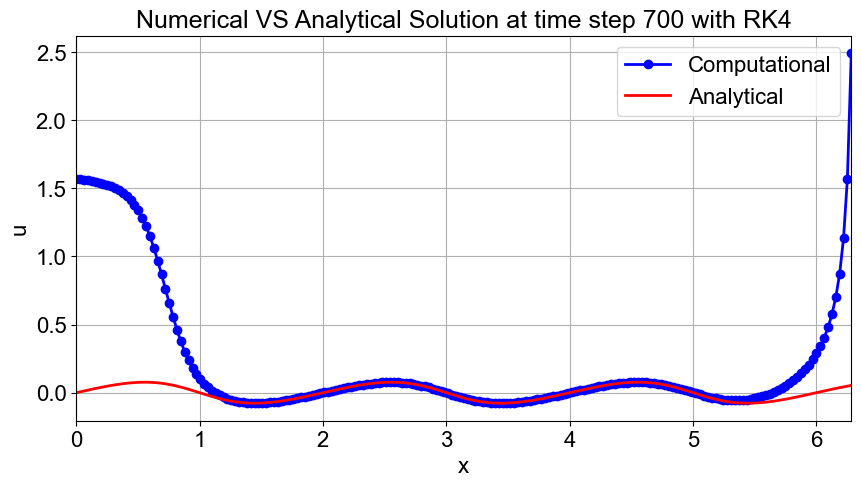

In [164]:
u = np.asarray([ufunc(t, x0, nu) for x0 in x])
nt = 700

# def update_burgers(u, dt, dx, nu):
#     # performs one time step of burgers' equation update
#     un = u.copy()  # create a copy of the current state
#     # update the internal points
#     u[1:-1] = un[1:-1] - dt * un[1:-1] * (un[1:-1] - un[0:-2]) / dx + \
#               nu * dt * (un[2:] - 2 * un[1:-1] + un[0:-2]) / dx**2
#     # update the first point using periodic boundary conditions
#     u[0] = un[0] - dt * un[0] * (un[0] - un[-2]) / dx + \
#            nu * dt * (un[1] - 2 * un[0] + un[-2]) / dx**2
#     u[-1] = u[0]  # enforce periodic boundary at the last point
#     return u

# for n in range(nt):
#     update_burgers(u, dt, dx, nu)

un = u.copy()
for n in range(1, nt+1):
    u = rk4_step(u, dt, dx, nu)

u_analy = np.asarray([ufunc(nt * dt, xi, nu) for xi in x])

# Create a new figure with a specific size
plt.figure(figsize=(10, 5), dpi = 100)
plt.plot(x, u, color='blue', linewidth=2, marker='o', label='Computational')
plt.plot(x, u_analy, color='red', linewidth=2, label='Analytical')
# Add labels to the x and y axes with a specific font size
plt.xlabel('x', fontsize=16)
plt.ylabel('u', fontsize=16)

# Add a title with a specific font size
plt.title(f'Numerical VS Analytical Solution at time step {nt} with RK4', fontsize=18)

# Add a grid
plt.grid(True)

# Add a legend with a specific location
plt.legend(loc='upper right')

# Set the limit for the x and y axes
plt.xlim([0, 2*np.pi])
# plt.ylim([-0.5, 0.5])

# Set the ticks for the x and y axes
#plt.xticks(np.arange(0, 2*np.pi, 1))
# plt.yticks(np.arange(-1, 1, 1))

# Display the plot
plt.show()
